<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

The dataset consists of information collected from Car Sale Advertisements for study/practice purpose where most of them are used cars. In this Exploratory Data Analysis (EDA), we are trying to analyze the Car Sales data and find interesting correlations between various features of the car.


---
<a name = Section2></a>
# **2. Problem Statement**
---

The notebooks explores the basic use of *Pandas* and will cover the basic commands of *Exploratory Data Analysis(EDA)* which includes *cleaning,* *munging,* *combining,* *reshaping,* *slicing,* *dicing,* and *transforming data* for analysis purpose.

**Exploratory Data Analysis**

Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :

- Finding patterns in Data
- Determining relationships in Data
- Checking of assumptions
- Preliminary selection of appropriate models
- Detection of mistakes

<a name = Section3></a>
# **3. Importing Libraries**

Importing the libraries necessary for performing the EDA.

In [1]:
import pandas as pd                                        # Importing package pandas (For Panel Data Analysis)
import numpy as np                                         # Importing package numpys (For Numerical Python) 
import pandas_profiling
import matplotlib.pyplot as plt                            # Importing pyplot interface to use matplotlib
import seaborn as sns                                      # Importing seaborn library for interactive visualization
%matplotlib inline
sns.set()

from subprocess import check_output

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

The dataset comprises 9576 observations of 10 columns. Below is a table showing names of all the columns and their descriptions.

|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|


In [50]:
# We will load the data set from the URL by using read_csv method.

used_cars = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', used_cars.shape)
used_cars.head(10)

Data Shape: (9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [3]:
used_cars.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


**Observations**: 

Here all numeric columns have count 9576 except engV. price and mileage have min value as Zero which needs to be replaced with NaN.


### **Data Information**

In [4]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [5]:
used_cars.isnull().sum()            # To find out null count of each column. Zeros will not count as null.

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

**Observations**: engV and drive have 434 and 511 null values respectively.

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it.

In [6]:
profile = pandas_profiling.ProfileReport(used_cars)
profile.to_file(output_file="used_cars_pre_profiling.html")

**Observations**: Initial observations on the basis of Pre-Profile Report of Used Cars Data.  

- car has high cardinality. 87 distinct values.
- drive has 511 missing values.
- engV has 434 missing values.
- mileage has 348 Zeros.
- price has 267 Zeros.
- model has high cardinality. 888 distinct values.
- Data has 113 duplicate rows.

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section pertains to performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data we need to verify and manipulate the integrity of the data by:

  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

In [7]:
# engType has "Other" values which will be replaced by NaN
# price has 267 zeros which should be treated as missing values. We will replace these by NaN
# mileage has 348 zeros which should be treated as missing values. We will again replace by NaN

used_cars.replace({'engType': 'Other', 'price': 0, 'mileage': 0}, np.nan, inplace=True)

In [8]:
# There are 113 duplicate rows in dataset. We will remove them.

used_cars.drop_duplicates(inplace=True) #inplace used to modify the dataset with applied command
used_cars.shape

(9463, 10)

## **Handling Numerical Data**

In [9]:
# Missing values - price: Replacing missing values based on [car,model] group product and median value of price based on this group

def get_median_price(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median()                    # Return median for a brand/model if the median exists.
    elif used_cars.groupby(['car'])['price'].count()[brand] > 0:
        brand_median = used_cars.groupby(['car'])['price'].apply(lambda x: x.median())[brand]
        return brand_median                  # Return median of brand if particular brand/model combo has no median,
    else:                                    # but brand itself has a median for the 'price' feature. 
        return used_cars['price'].median()   # Otherwise return dataset's median for the 'price' feature.
    
price_median = used_cars.groupby(['car','model'])['price'].apply(get_median_price).reset_index()
price_median.rename(columns={'price': 'price_med'}, inplace=True)
price_median.head()

,car,model,price_med
0,Acura,MDX,17200.0
1,Acura,RL,13950.0
2,Acura,TL,8699.0
3,Acura,TLX,38200.0
4,Acura,ZDX,30999.0


In [10]:
def fill_with_median(x):
    if pd.isnull(x['price']):
        return price_median[(price_median['car'] == x['car']) & (price_median['model'] == x['model'])]['price_med'].values[0]
    else:
        return x['price']
    
used_cars['price'] = used_cars.apply(fill_with_median, axis=1)
used_cars.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,NaN,NaN,yes,2013,E-Class,NaN


In [11]:
# Missing values - engV: Replacing missing values based on [car,model] group product and median value of price based on this group

def get_median_engV(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median()                     # Return median for a brand/model if the median exists.
    elif used_cars.groupby(['car'])['engV'].count()[brand] > 0:
        brand_median = used_cars.groupby(['car'])['engV'].apply(lambda x: x.median())[brand]
        return brand_median                   # Return median of brand if particular brand/model combo has no median,
    else:                                     # but brand itself has a median for the 'engV' feature. 
        return used_cars['engV'].median()     # Otherwise return dataset's median for the 'engV' feature.
    
engV_median = used_cars.groupby(['car','model'])['engV'].apply(get_median_engV).reset_index()
engV_median.rename(columns={'engV': 'engV_med'}, inplace=True)
engV_median.head()

,car,model,engV_med
0,Acura,MDX,3.7
1,Acura,RL,3.5
2,Acura,TL,3.2
3,Acura,TLX,2.4
4,Acura,ZDX,3.7


In [12]:
def fill_with_median(x):
    if pd.isnull(x['engV']):
        return engV_median[(engV_median['car'] == x['car']) & (engV_median['model'] == x['model'])]['engV_med'].values[0]
    else:
        return x['engV']
    
used_cars['engV'] = used_cars.apply(fill_with_median, axis=1)
used_cars.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,NaN,yes,2013,E-Class,NaN


In [13]:
# Missing values - mileage: Replacing missing values based on [car,model] group product and median value of price based on this group

def get_median_mileage(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median()                     # Return median for a brand/model if the median exists.
    elif used_cars.groupby(['car'])['mileage'].count()[brand] > 0:
        brand_median = used_cars.groupby(['car'])['mileage'].apply(lambda x: x.median())[brand]
        return brand_median                   # Return median of brand if particular brand/model combo has no median,
    else:                                     # but brand itself has a median for the 'engV' feature. 
        return used_cars['mileage'].median()     # Otherwise return dataset's median for the 'engV' feature.
    
mileage_median = used_cars.groupby(['car','model'])['mileage'].apply(get_median_engV).reset_index()
mileage_median.rename(columns={'mileage': 'mileage_med'}, inplace=True)
mileage_median.head()

,car,model,mileage_med
0,Acura,MDX,85.0
1,Acura,RL,138.0
2,Acura,TL,145.0
3,Acura,TLX,4.0
4,Acura,ZDX,32.0


In [14]:
def fill_with_median(x):
    if pd.isnull(x['mileage']):
        return mileage_median[(mileage_median['car'] == x['car']) & (mileage_median['model'] == x['model'])]['mileage_med'].values[0]
    else:
        return x['mileage']
    
used_cars['mileage'] = used_cars.apply(fill_with_median, axis=1)
used_cars.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,NaN,yes,2013,E-Class,NaN


## **Handling Categorical Data**

In [15]:
# Missing values - drive: Replacing missing values for drive column based on [car,model] group product and mode value of this group

def get_drive_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode()                           # Return mode for a brand/model if the mode exists.
    elif used_cars.groupby(['car'])['drive'].count()[brand] > 0:
        brand_mode = used_cars.groupby(['car'])['drive'].apply(lambda x: x.mode())[brand]
        return brand_mode                         # Return mode of brand if particular brand/model combo has no mode,
    else:                                         # but brand itself has a mode for the 'drive' feature. 
        return used_cars['drive'].mode()          # Otherwise return dataset's mode for the 'drive' feature.
    
drive_modes = used_cars.groupby(['car','model'])['drive'].apply(get_drive_mode).reset_index().drop('level_2', axis=1)
drive_modes.rename(columns={'drive': 'drive_mode'}, inplace=True)
drive_modes.head()

,car,model,drive_mode
0,Acura,MDX,full
1,Acura,RL,full
2,Acura,TL,front
3,Acura,TLX,front
4,Acura,ZDX,full


In [16]:
def fill_with_mode(x):
    if pd.isnull(x['drive']):
        return drive_modes[(drive_modes['car'] == x['car']) & (drive_modes['model'] == x['model'])]['drive_mode'].values[0]
    else:
        return x['drive']
    
used_cars['drive'] = used_cars.apply(fill_with_mode, axis=1)
used_cars.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,NaN,yes,2013,E-Class,rear


In [17]:
# Missing values - engType: Replacing missing values for engType column based on [car,model] group product and mode value of this group

def get_engType_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode()                          # Return mode for a brand/model if the mode exists.
    elif used_cars.groupby(['car'])['engType'].count()[brand] > 0:
        brand_mode = used_cars.groupby(['car'])['engType'].apply(lambda x: x.mode())[brand]
        return brand_mode                        # Return mode of brand if particular brand/model combo has no mode,
    else:                                        # but brand itself has a mode for the 'engType' feature. 
        return used_cars['engType'].mode()       # Otherwise return dataset's mode for the 'engType' feature.
    
engType_modes = used_cars.groupby(['car','model'])['engType'].apply(get_engType_mode).reset_index().drop('level_2', axis=1)
engType_modes.rename(columns={'engType': 'engType_mode'}, inplace=True)
engType_modes.head()

,car,model,engType_mode
0,Acura,MDX,Petrol
1,Acura,RL,Gas
2,Acura,TL,Gas
3,Acura,TLX,Petrol
4,Acura,ZDX,Petrol


In [18]:
def fill_with_mode(x):
    if pd.isnull(x['engType']):
        return engType_modes[(engType_modes['car'] == x['car']) & (engType_modes['model'] == x['model'])]['engType_mode'].values[0]
    else:
        return x['engType']
    
used_cars['engType'] = used_cars.apply(fill_with_mode, axis=1)
used_cars.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,Diesel,yes,2013,E-Class,rear


In [19]:
# Checking if we have any missing data

used_cars.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---


In [20]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(used_cars)
profile.to_file(output_file="used_cars_post_profiling.html")

After preprocessing the data now does not contain missing values. So, the pandas profiling report which I have generated after preprocessing will give more beneficial insights. We can compare the two reports, i.e used_cars_pre_profiling.html and used_cars_post_profiling.html.

**Observations**:

In the Dataset info, Total Missing(%) = 0.0%
Number of variables = 11



---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---
Let's look into feature available in used cars dataset in detail an Visualize them.

Text(0.5, 1.0, 'Top 10 car brands')

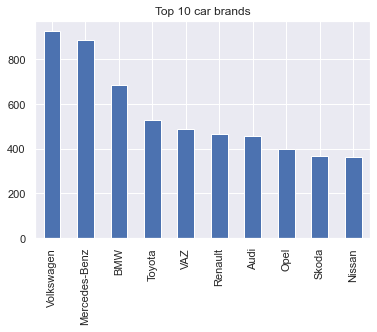

In [21]:
used_cars.car.value_counts().head(10).plot.bar()
plt.title("Top 10 car brands")

Top three preferred car brands are **Volkswagen**, **Mercedes Benz** and **BMW**.

Text(0.5, 1.0, 'Donut Plot showing the type of cars sold')

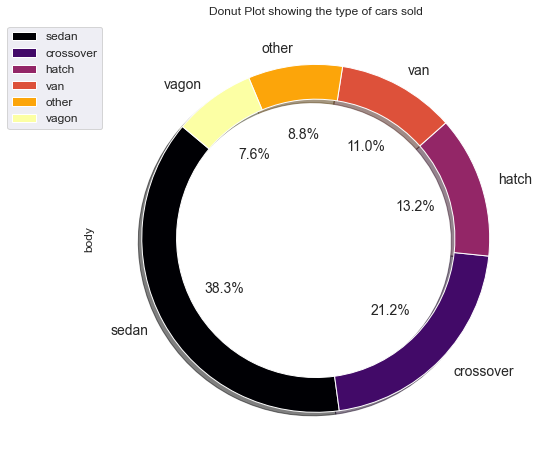

In [22]:
space = np.ones(6)/5
used_cars['body'].value_counts().plot(kind='pie',  fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.20), 
                                       shadow=True, startangle=140, figsize=(8,8), cmap='inferno', )
plt.legend(loc='upper center', bbox_to_anchor=(-0.1, 1.),fontsize=12)
plt.ylabel('body')
plt.title('Donut Plot showing the type of cars sold')

**Sedan** is the most sold car type followed by **Crossover**. This information can be utilized for achieving max sale and production.

Text(0.5, 1.0, 'Most preferred engType')

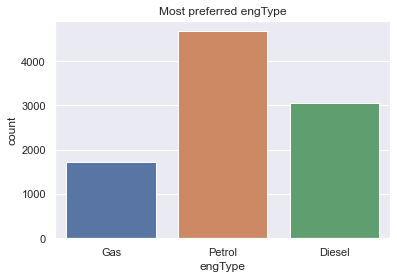

In [24]:
sns.countplot(x='engType', data=used_cars, orient='h')
plt.title("Most preferred engType")

**Petrol** remains the most preferred **engType** over the years.

Text(0.5, 1.0, 'Heatmap for correlated features for Used Cars Datset')

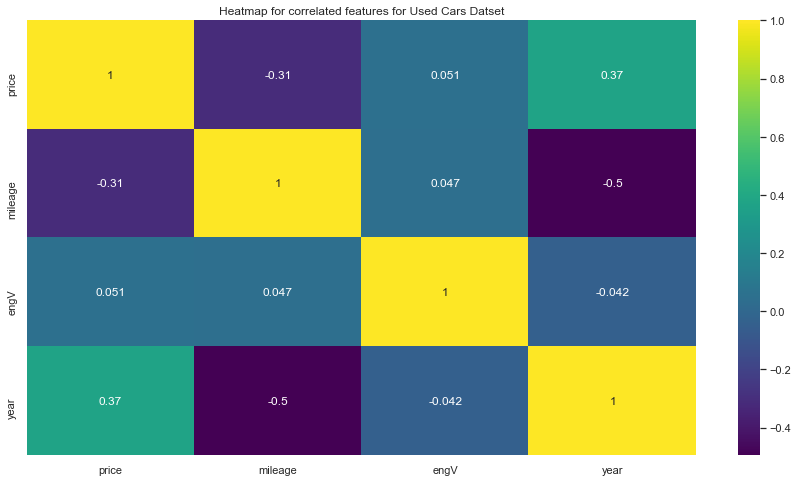

In [46]:
corr_mat = used_cars.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_mat, annot=True, cmap='viridis')
plt.title("Heatmap for correlated features for Used Cars Datset")

Above graph shows positive/negative correlations between the features. 

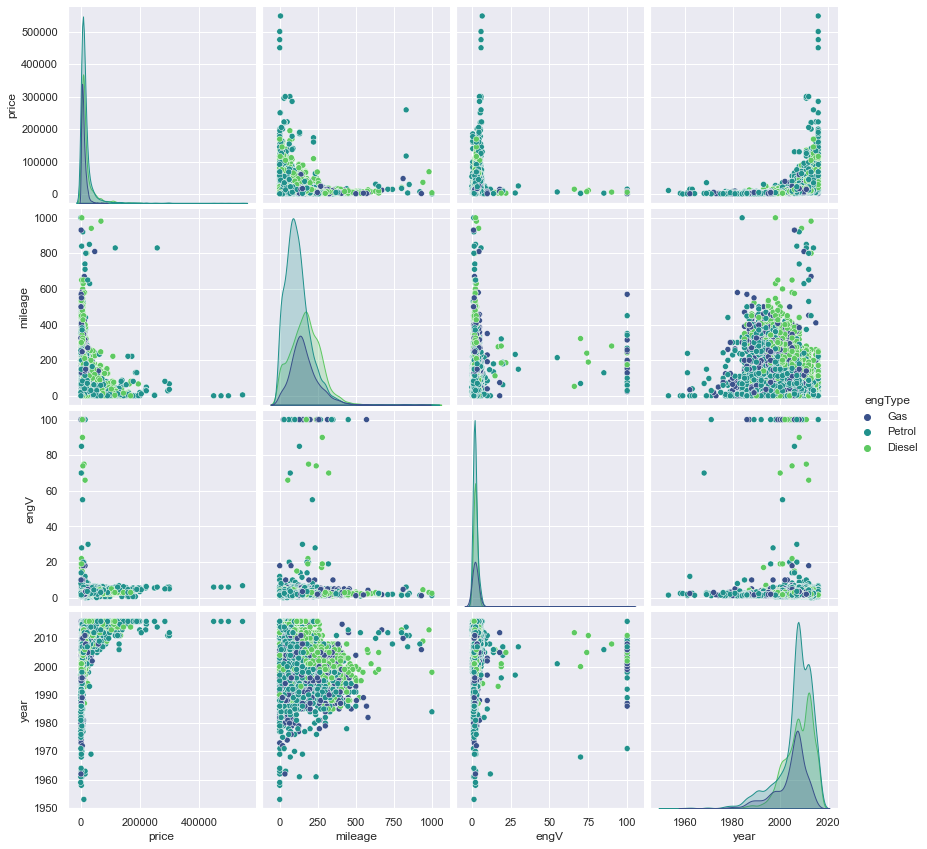

In [26]:
sns.pairplot(used_cars, hue='engType', palette="viridis", height=3)

This pairplot gives similar observations as the Heatmap: 
- Price variation based on Year and Mileage
- There is increase in Petrol engType cars over the years. 
- Price also depends on mileage of the car.

,year,registration,sales
0,2008,yes,1150
1,2007,yes,915
2,2012,yes,756
3,2011,yes,691
4,2013,yes,642
5,2006,yes,541
6,2016,yes,459
7,2005,yes,392
8,2010,yes,383
9,2014,yes,367


Text(0.5, 1.0, 'Year - Sales lineplot (1953 - 2016)')

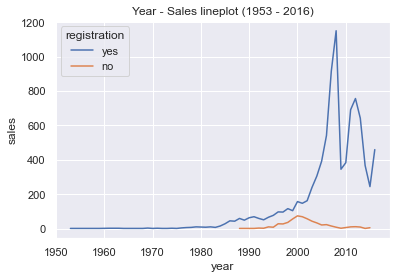

In [48]:
df_sale = used_cars.groupby('year')['registration'].value_counts().sort_values(ascending=False)
df_sale = pd.DataFrame(df_sale)
df_sale.rename(columns={'registration': 'sales'}, inplace=True)
df_sale.reset_index(inplace=True)
display(df_sale.head(10))
sns.lineplot(data=df_sale, y='sales', x='year', hue='registration')
plt.title("Year - Sales lineplot (1953 - 2016)")

Year 2008 witnessed the highest sales. Total sales were much higher during the period after 2005 as compared to the period before 2005.  

Text(0.5, 1.0, 'year - price - drive lineplot')

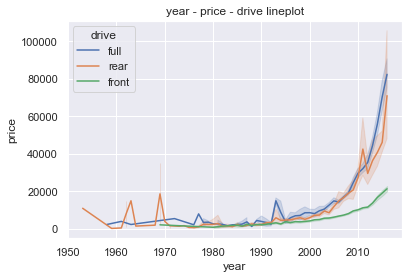

In [28]:
sns.lineplot(data=used_cars, y='price', x='year', hue='drive')
plt.title("year - price - drive lineplot")

Year 2000 onwards we observe increase in price across all drives. However, **Full** and **Rear** have steeper increase as compared to that of **Front**.

Text(0.5, 1.0, 'year - price - drive lineplot (2005 - 2016)')

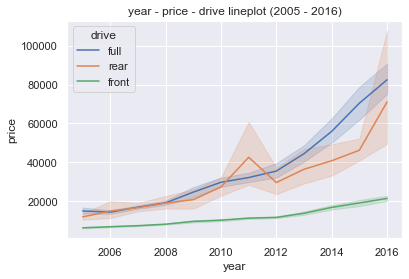

In [29]:
sns.lineplot(data=used_cars[used_cars.year >= 2005], y='price', x='year', hue='drive')
plt.title("year - price - drive lineplot (2005 - 2016)")

2005 onwards, price increase in **full** drive cars is much steeper than that in **front** drive cars. **Rear** drive cars saw price increase but not as consistent as the other two drives.

Text(0.5, 1.0, 'Car Drive vs Mileage')

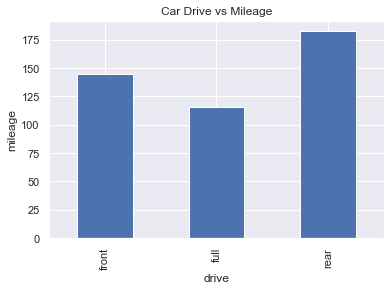

In [30]:
used_cars.groupby('drive')['mileage'].mean().plot(kind='bar')
plt.xlabel('drive')
plt.ylabel('mileage')
plt.title('Car Drive vs Mileage')



**Rear** drive cars are more fuel efficient than **front** and **full**. 

Text(0.5, 1.0, 'Engine Type vs Mileage')

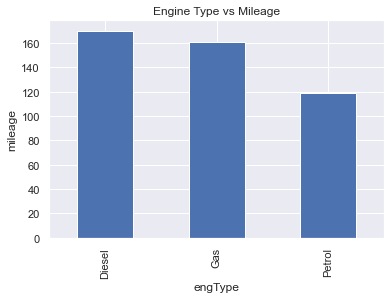

In [31]:
used_cars.groupby('engType')['mileage'].mean().plot.bar()
plt.xlabel('engType')
plt.ylabel('mileage')
plt.title('Engine Type vs Mileage')

**Diesel** cars give better **mileage** than **Gas** or **Petrol**. 

Text(0.5, 1.0, 'Revenue Trends')

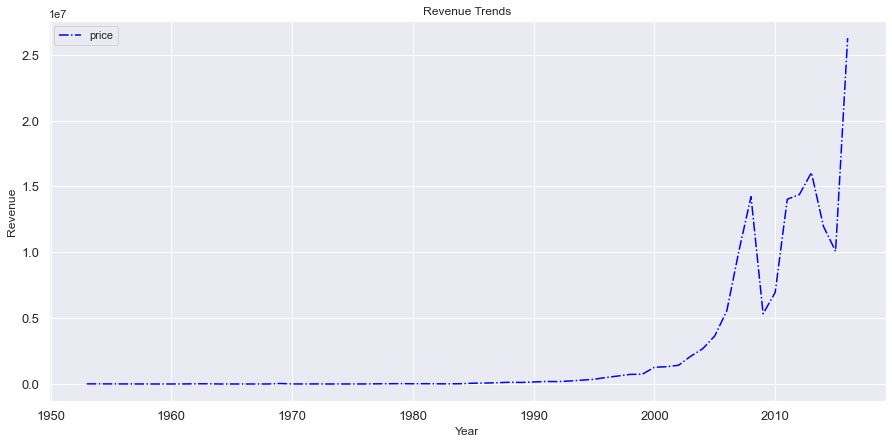

In [32]:
used_cars_groupby = used_cars.groupby('year').sum()
used_cars_groupby[['price']].plot(kind='line', figsize=(15,7), color='blue', fontsize=13, linestyle='-.')

plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue Trends')

Data shows that **Revenue** remained linear from year 1953 till around 2000. 2000 onwards we see an upword trend though some erratic behaviour in between.

array([<AxesSubplot:ylabel='registration'>], dtype=object)

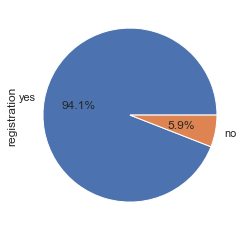

In [33]:
used_cars.registration.value_counts().plot.pie(autopct='%1.1f%%',subplots=True)

Of all cars sold ~ 94% had **registration** whereas 6% did not.

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**


1. Which brand of cars is most selling brand ?

From above analysis we can conclude that Volkswagen and Mercedes-Benz are top most brands on sale and hence these would be preferred choices for people.

2. Which type of cars are more selling?

Sedan body type has maximum sale over the years. This shows People prefer sedan type of body mostly and hence this information can be used for Sales and manufacturing. Petrol engine type is preferred over Diesel & Gas.

3. What are the factors affecting the prices of cars?

Price change is based on mileage value and engine type.

4. Year 2008 witnessed the highest sales. Total sales were much higher during the period after 2005 as compared to the period before 2005.


5. 2005 onwards, price increase in full drive cars is much steeper than that in front drive cars. Rear drive cars saw price increase but not as consistent as the other two drives.


6. Rear drive cars are more fuel efficient than front and full.


7. Data shows that Revenue remained linear from year 1953 till around 2000. 2000 onwards we see an upward trend though some erratic behavior in between.


8. All cars sold had ~ 94% registration whereas 6% did not.

<a name = Section92></a>
### **9.2 Actionable Insights**

Based on the insights the company can :

Focus/invest more on selling vehicles which are Sedan model, Rear drive and diesel engine.

Explore on other engine type e.g. electric or hybrid.